### This notebook requires scikit-learn 1.0.2

In [1]:
!pip install scikit-learn==1.0.2 --user

In [2]:
# Check if 1.0.2 actually installed... if not please re-reun cell 1 
import sklearn
if sklearn.__version__ != '1.0.2':
    print("Please re-run cell 1: scikit-learn version still not satisfied - currently {}".format(sklearn.__version__)) 
else:
    print("Good to go!")

Good to go!


In [3]:
import sys
sys.path.insert(1, '../Model Development')
from creditrisk_pipeline import * 
import warnings
warnings.filterwarnings("ignore")

### Instantiate model class, prediction data and model pipeline

In [4]:
cr = CreditRiskModel("../config/creditrisk_config.yaml")

In [5]:
X_train, y_train = cr.load_data(is_train_data = True)
X_test, y_test = cr.load_data(is_train_data = False)

In [6]:
pipe = cr.load_pipeline()

### Save test raw data for re-use

In [7]:
y_pred = cr.score_pipeline(pipe, X_test)
X_test['score'] = y_pred

In [8]:
X_test.to_csv('../data/test/X_test_y_pred.csv')

### Interest rates averaged per 50 equal-width score bins

distinct interest rates
Correlation Coefficient: (0.4332708390895694, 0.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


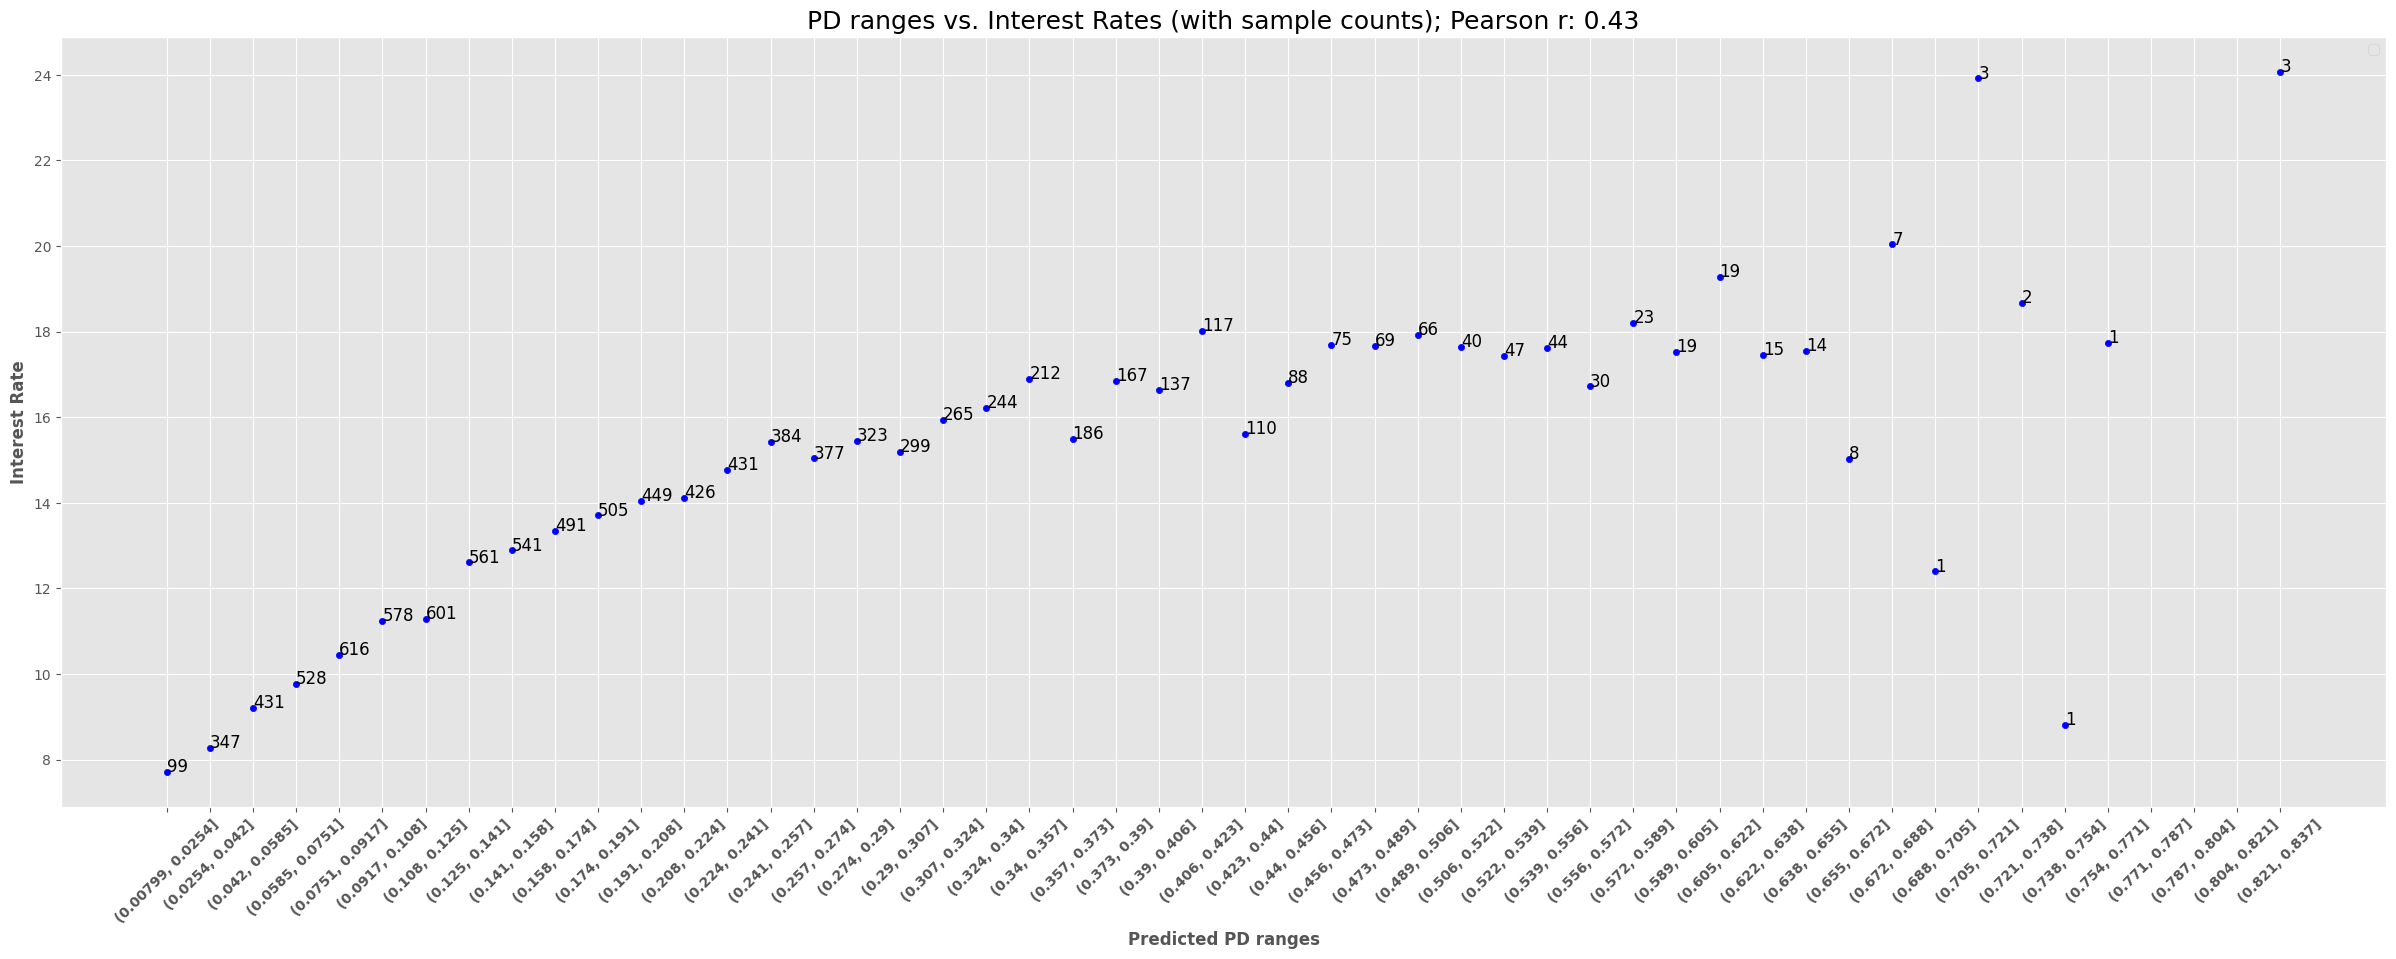

In [9]:
cr.interest_rate_vs_score(pipe, X_test)

### Distribution of prediction data & 0.1 quantile

Total # of predictions: 10000
0.1 Quantile Probability: 0.0626


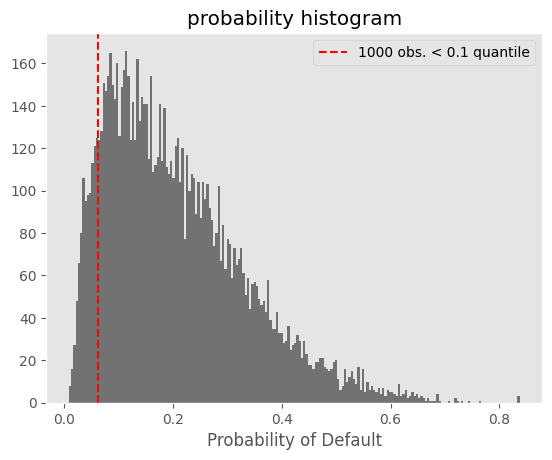

In [10]:
cr.draw_histogram(pipe, pd.DataFrame(X_test))

### Visualize Pipeline

In [11]:
cr.draw_pipeline(pipe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Num',
                                                  Pipeline(steps=[('Average '
                                                                   'Fico',
                                                                   FicoCombiner()),
                                                                  ('Format '
                                                                   'Strings',
                                                                   StringFormatter()),
                                                                  ('Mean '
                                                                   'Impute',
                                                                   SimpleImputer())]),
                                                  ['acc_now_delinq',
                                                   'acc_open_past_24mths',
                                                   'all_util', 'annual_inc',
                                                   'annual_inc_joint',
                                                   'avg_cur_bal',
                                                   'bc_open_to_buy', 'bc_util',
                                                   'collections_12_mths_ex_med',
                                                   'de...
                                                  ['last_credit_pull_d'])])),
                ('Robust Scaler', RobustScaler()),
                ('power_transformer', PowerTransformer()),
                ('oversampler', ADASYN(sampling_strategy=0.8)),
                ('undersampler', RandomUnderSampler(sampling_strategy=0.9999)),
                ('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=5, dual=False,
                                                     penalty='l1'))),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x0000016E47FF82B0>)])

In [12]:
len(pipe[:-1].get_feature_names_out())

67

### Model Explanation based on SHAP (SHapley Additive exPlanations) - catboost

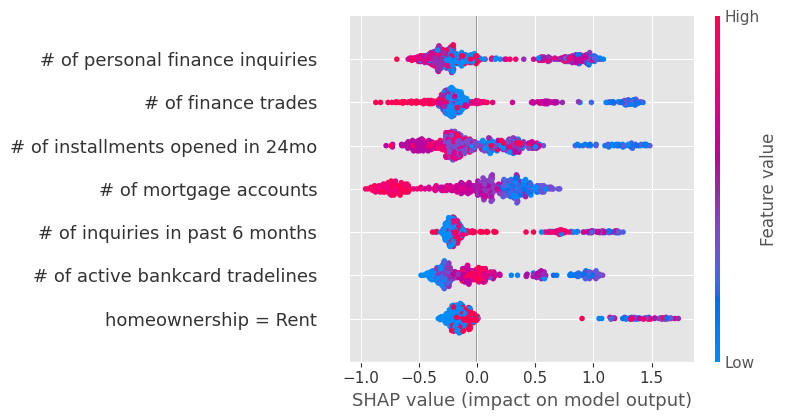

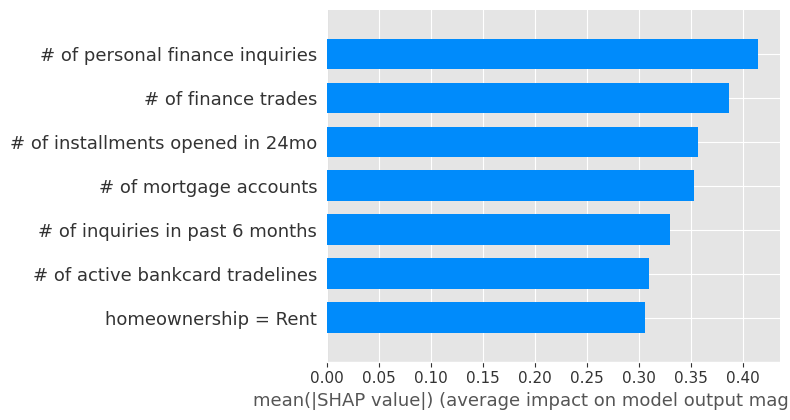

In [13]:
cr.shap_explanation(pipe, X_test, y_test, shap_sample_size = 500)